In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

<h2>Standard Deviation - Long Method </h2>

In [3]:
import statistics as stats 
import math as math

<AxesSubplot:xlabel='Date', ylabel='Stddev in $'>

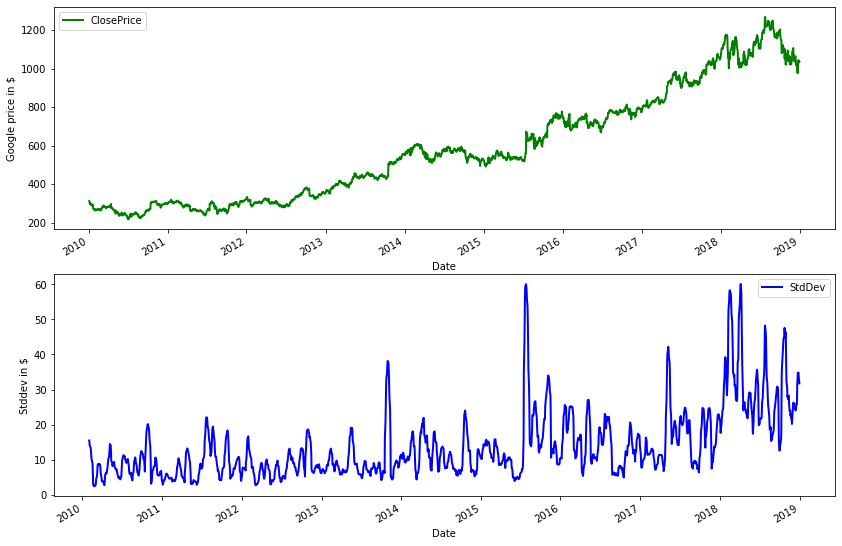

In [17]:
time_period = 20
history = [] #Price history
sma_values = [] #SMA values for visualization(Mean Price)
stddev_values = [] #History of computed stdev values
close = goog_data['Adj Close']


for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del(history[0])
    
    sma = stats.mean(history)
    sma_values.append(sma)

    variance = 0 #Variance is square of standard deviation
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    
    stdev = math.sqrt(variance / len(history))
    stddev_values.append(stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data =goog_data.assign(StsDev20Day=pd.Series(stddev_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
stddev = goog_data['StdDev']

#Viasualition
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)

<h2>Standard Deviation -Short Code </h2>


In [12]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date', ylabel='Stddev in $'>

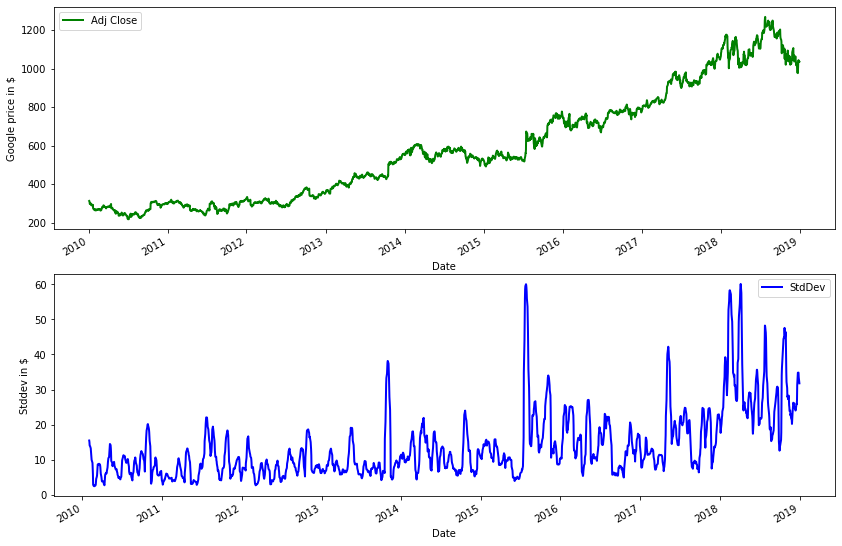

In [18]:
goog_data['StdDev'] = goog_data['Adj Close'].rolling(window=20).std()

#Visualition
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
goog_data['Adj Close'].plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
goog_data['StdDev'].plot(ax=ax2, color='b', lw=2., legend=True)